In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
# defining function for plotting correlation heatmap
def plot_heatmap(correlation, title):
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(correlation,annot=True,fmt='.3f',linewidths=0.3,annot_kws={"size": 18})
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12) 
    plt.title(title, fontsize=20)
    ax.figure.axes[-1].tick_params(labelsize=18) # To increase fontsize of colorbar ticks
    #lim = len(correlation.columns)
    #ax.set_ylim([0,lim]) # to make the map display correctly without trimming the edges
    plt.show()
    return

In [3]:
# importing the dataset
dataset = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True, header = None)
dataset.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [4]:
dataset.head(5)

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Exploratory data Analysis

##### Plotting the pairs plot

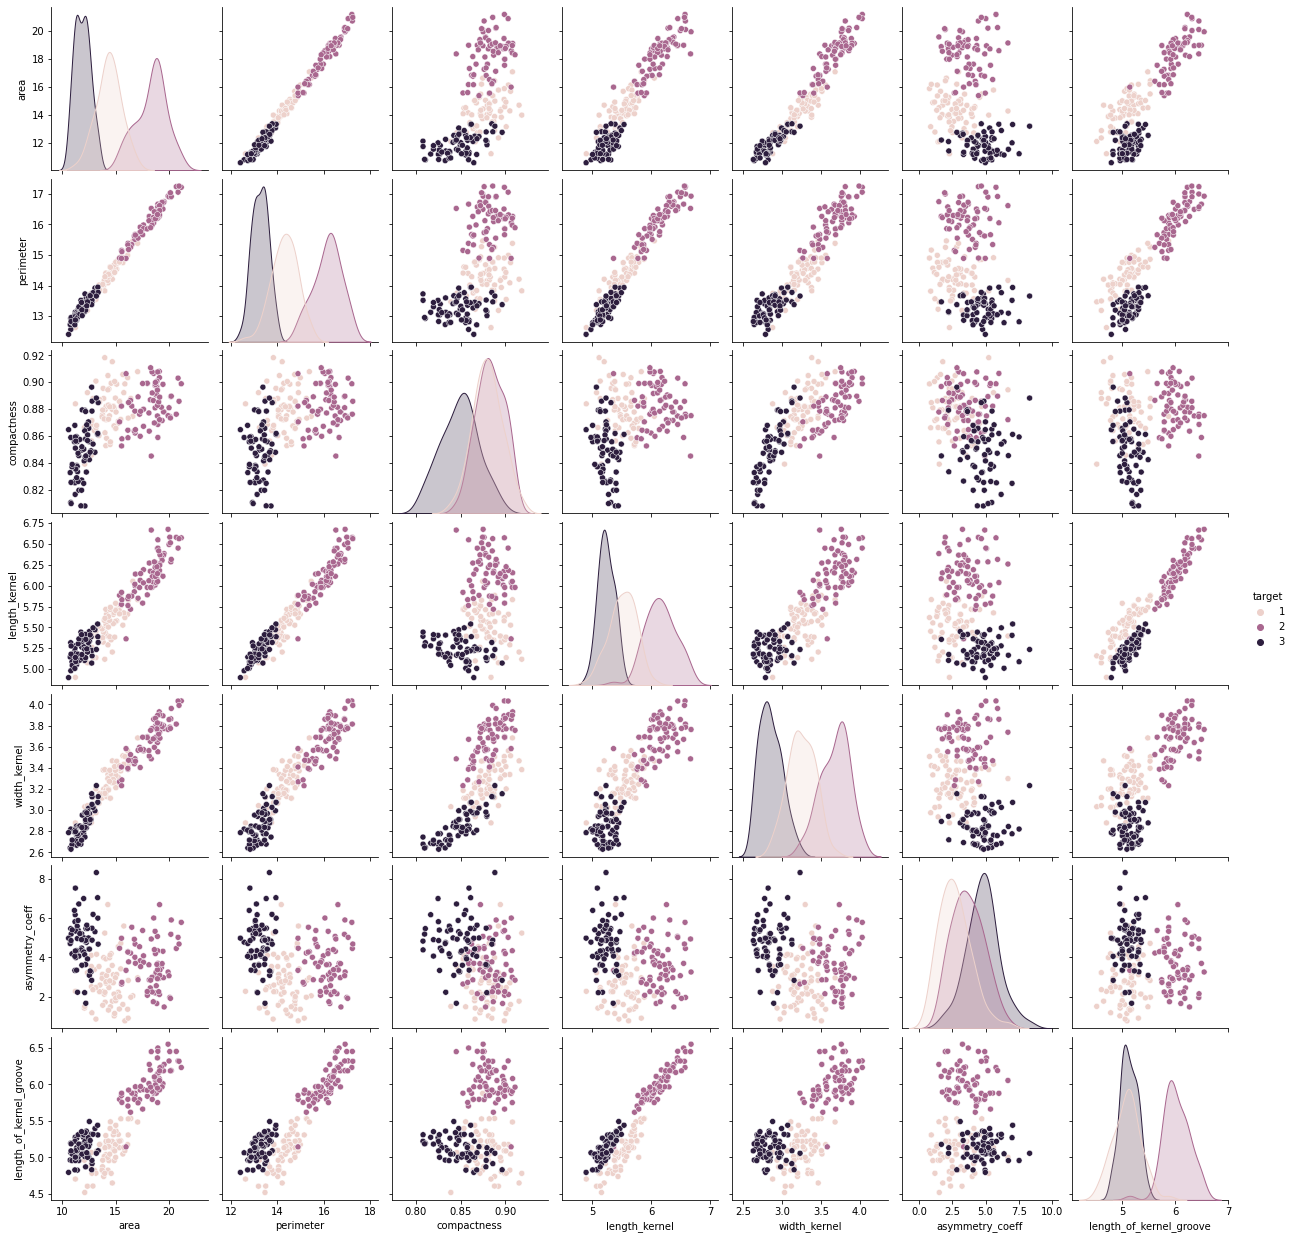

In [5]:
sns.pairplot(dataset, hue="target")

### <span style="color:blue">Observations from the Pairplot</span>


- The pair plot shows a highly positive linear relationship between area and perimeter.
- Area also has a positive linear relationship with kernel length and kernel width.
- Perimeter has a positive linear relationship with kernel length and kernel width.
- Kernel length has a positive linear relationship with the length of kernel groove.
- Assymetry coefficient does not show linear relationship with any of the other features.

#### Checking the correlation

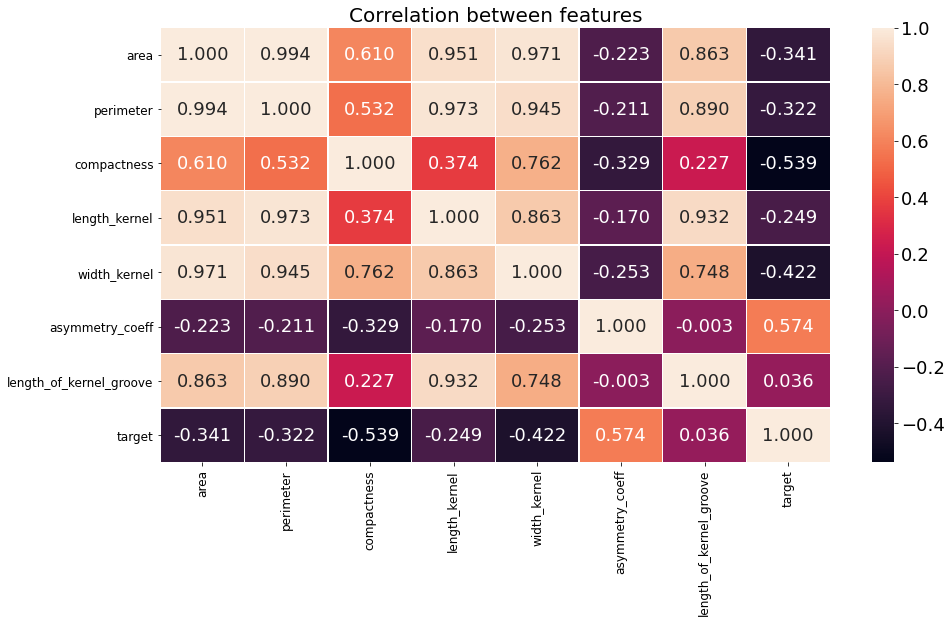

In [6]:
plot_heatmap(dataset.corr(), 'Correlation between features')

## <span style="color:blue">Observations about correlation heatmap</span>

- Assymetry Coefficient has the highest positive correlation with the target (0.574)
- Compactness has the highest negative correlation with the target (-0.539)
- Area is highly correlated with perimeter, Length of the kernel, Width of the kernel, and length of the kernel groove (with a correlation > 0.86 in each case) which is a possible indication of multicollinearity. 
- Likewise, perimeter is also highly correlated with area, Length of kernel, width of kernel, and length of kernel groove. This is likely because area and perimeter are both directly proportional to kernel length and kernel width.
- Length of kernel and length of kernel grove are also highly correlated with a correlation of 0.932
- Length of kernel groove has the least correlation with the target (0.036)

##### Calculating the mean, variance, skew, kurtosis for the datasets

In [7]:
# comparing for the different target
for target in dataset["target"].unique():
    print("*** target = ", ['kama','Rosa','canadian'][target - 1], "***")
    for column in dataset.iloc[:,:-1].columns:
        mean = round(dataset[dataset['target'] == target][column].mean(), 2)
        variance = round(dataset[dataset['target'] == target][column].var(), 2)
        skew = round(dataset[dataset['target'] == target][column].skew(), 2)
        kurtosis = round(dataset[dataset['target'] == target][column].kurt(), 2)
        print(column, "Mean -", mean)
        print(column, "Variance -", variance)
        print(column, "Skew -", skew)
        print(column, "Kurtosis -", kurtosis)
        print()

*** target =  kama ***
area Mean - 14.35
area Variance - 1.39
area Skew - -0.14
area Kurtosis - 0.02

perimeter Mean - 14.31
perimeter Variance - 0.31
perimeter Skew - -0.33
perimeter Kurtosis - 0.26

compactness Mean - 0.88
compactness Variance - 0.0
compactness Skew - 0.03
compactness Kurtosis - -0.07

length_kernel Mean - 5.51
length_kernel Variance - 0.05
length_kernel Skew - -0.29
length_kernel Kurtosis - -0.1

width_kernel Mean - 3.25
width_kernel Variance - 0.03
width_kernel Skew - -0.0
width_kernel Kurtosis - -0.38

asymmetry_coeff Mean - 2.69
asymmetry_coeff Variance - 1.44
asymmetry_coeff Skew - 0.82
asymmetry_coeff Kurtosis - 0.95

length_of_kernel_groove Mean - 5.09
length_of_kernel_groove Variance - 0.07
length_of_kernel_groove Skew - 0.21
length_of_kernel_groove Kurtosis - 0.37

*** target =  Rosa ***
area Mean - 18.37
area Variance - 2.0
area Skew - -0.33
area Kurtosis - -0.43

perimeter Mean - 16.16
perimeter Variance - 0.36
perimeter Skew - -0.3
perimeter Kurtosis - -0

### <span style="color:blue"> Nature of the data and observations </span>

From the mean
- The Rosa species has the largest mean area and perimeter. Thus we can say that Rosa specie is on average larger than the other species.
- The Canadian species has the smallest mean area and perimeter

From the variance
- Overall, the variance of the different features of individual species are relatively low which means that the for each specie, the feature values lie within a small range around the mean.
- Of all the features, across all the species, Assymetry coefficient has the high variance.
- Of all the features, across all the species, compactness has the lowest variance (~ 0).

From the skew
- All features of the Canadian species are skewed to the right except perimeter which is skewed to the left (-0.06).
- All features of the Rosa species are skewed to the left except assymetry coefficient which is skewed to the right (0.28).
- For the Kama species area, perimeter and lenght of kernel are skewed to the left, width of the kernel is symmetric and the rest are skewed to the right.
- For kama specie, Assymetry coefficient has the highest skew (0.82) while Kernel width  has the lowest skew (~ 0).
- For Rosa specie, Kernel width has the highest skew (0.35) while Kernel length  has the lowest skew (0.14).
- For Rosa specie, Kernel width has the highest skew (0.5) while Compactness  has the lowest skew (~ 0).

From the Kurtosis
- For Kama specie, Assymetry Coefficient has the highest positive kurtosis (0.95) meaning the its distribution curve doesnt flatten out on the tails. 
- For Rosa specie, all features have negative kurtosis except Kernel length anf Length of kernel Groove. Also, Compactness has the highest negative kurtosis (-0.65) which means the curve flattens out too much on the tails.
- For Canadian specie, Assymetry Coefficient has the highest positive kurtosis (0.75) meaning the its distribution curve doesnt flatten out on the tails while Area has the highest negative kurtosis (-0.78) which means the curve flattens out too much on the tails.

## Data Preparation

##### Checking for missing values

In [8]:
# checking for missing values in rows
for i in range(len(dataset)):
    row = dataset.iloc[i, :]
    if row.isna().sum() > 0:
        print(i , ": ", row.isna().sum())

### <span style="color:blue"> Missing Values </span>
There are no missing values in the dataset

##### Checking for outliers

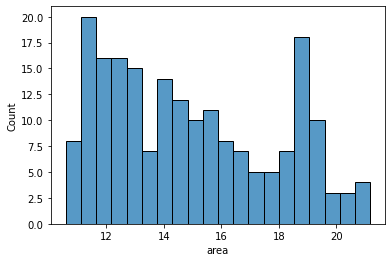

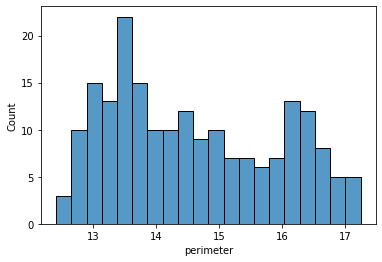

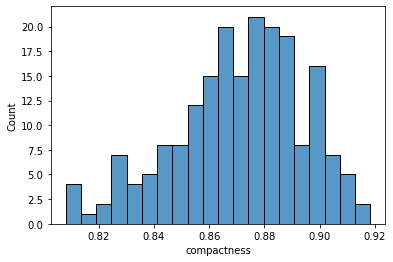

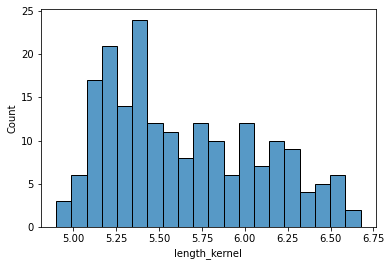

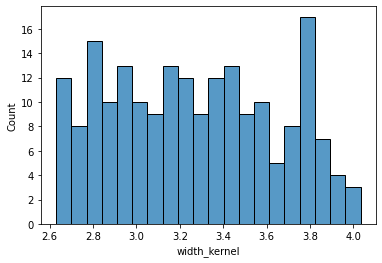

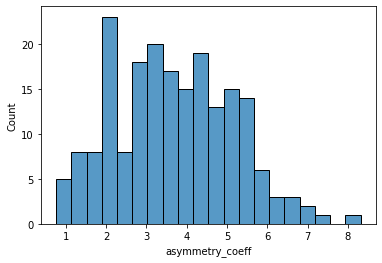

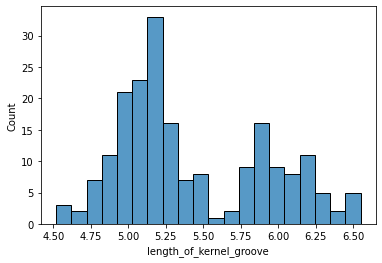

In [9]:
# Using histogram
for column in dataset.iloc[:,:-1].columns:
    plt.figure()
    sns.histplot(data = dataset, x = column, bins = 20)
    plt.show()

### <span style="color:blue"> Observation from histogram </span>
- There is an outlier in Assymetry Coefficient with a value slightly greater than 8

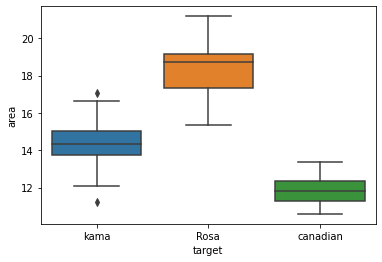

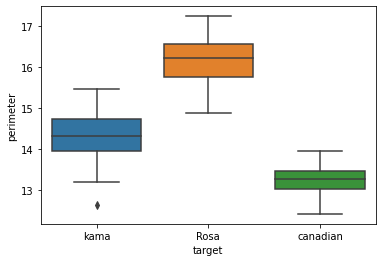

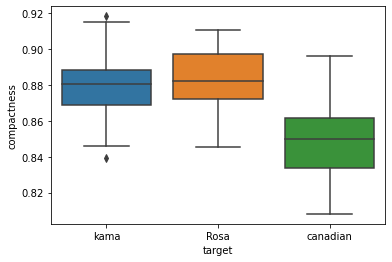

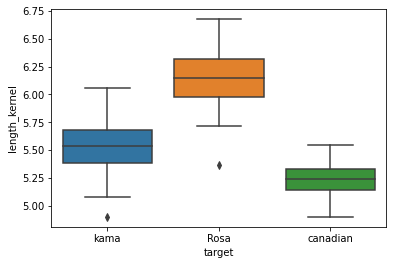

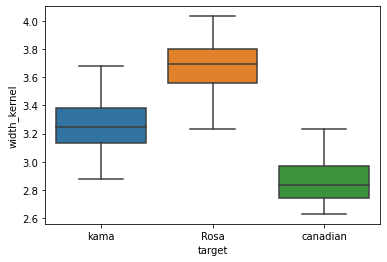

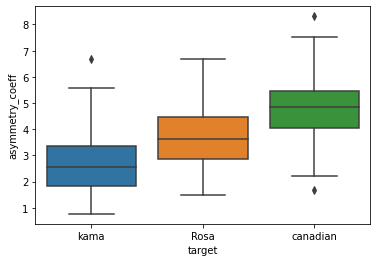

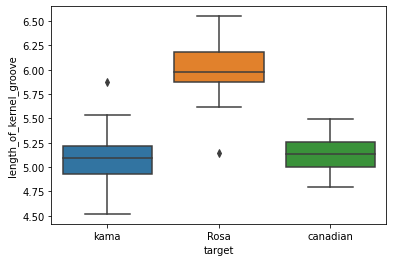

In [10]:
# finer detection using box plot
for column in dataset.columns[:-1]:
    plt.figure()
    ax = sns.boxplot(x="target", y=column, data=dataset)
    ax.set_xticks(range(3))
    ax.set_xticklabels(['kama','Rosa','canadian'])
    plt.show()

### <span style="color:blue"> Notes About Outliers from the boxplot </span>
Boxplot method uses inter quartile range (IQR) for outlier detection.

| Features | No of Outliers for Kama | No of Outliers for Rosa |No of Outliers for Canadian |
| --- | --- | --- |--- |
| Area | 2 | 0 | 0 |
| Perimeter | 1 | 0 | 0 |
| Compactness | 2 | 0 | 0 |
| Length of kernel | 1 | 1 | 0 |
| Width of kernel | 0 | 0 | 0 |
| Assymetry Coefficient | 1 | 0 |  2|
| Length of Kernel Groove | 1 | 1 | 0 |
 
For Area
- Kama has outliers above the high fence and below the low fence.

For Perimeter
- Kama has outliers below the low fence.

For Compactness
- Kama has outliers above the high fence and below the low fence.

For Length of Kernel
- Kama has outliers below the low fence.
- Rosa has outliers below the low fence.

For Width of Kernel
- There are no ouliers in this feature across the three species.

For Assymetry Coefficient
- Kama has outliers above the high fence.
- Canadian has outliers above the high fence and below the low fence.

Length of Kernel Groove
- Kama has outliers above the high fence.
- Rosa has outliers below the low fence.

In [11]:
# Handling Outliers by replacing them with group mean
for column in dataset.columns[:-1]:
    for target in dataset["target"].unique():
        Q1 = dataset[column][dataset["target"] == target].quantile(0.25)
        Q3 = dataset[column][dataset["target"] == target].quantile(0.75)
        IQR = Q3 - Q1 #Interquartile range
        fence_low = Q1 - (1.5 * IQR)
        fence_high = Q3 + (1.5 * IQR)

        df2 = pd.DataFrame(dataset[dataset['target'] == target][column])

        for index in df2[df2[column] < fence_low].index:
            dataset.loc[index, column] = np.nan
        for index in df2[df2[column] > fence_high].index:
            dataset.loc[index, column] = np.nan 

group_mean = dataset.groupby("target").mean()
for column in dataset.columns[:-1]:
    for index in dataset[dataset[column].isna()].index:
        target = dataset.iloc[index,-1]
        dataset.loc[index, column] = group_mean[column][target]

### <span style="color:blue"> Handling the outliers </span>
The method used in handling the oultliers was Estimation.
The outliers in each feature of a specie were replaced by the mean of that feature for the specie.

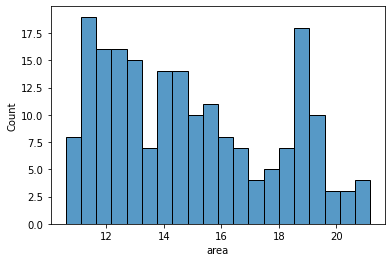

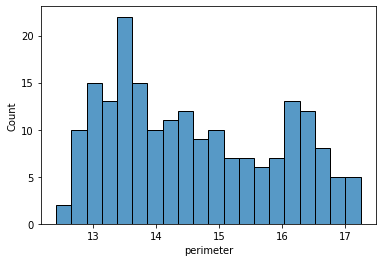

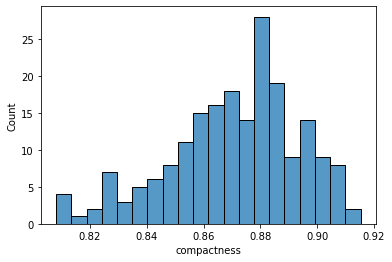

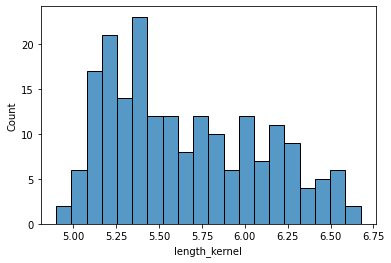

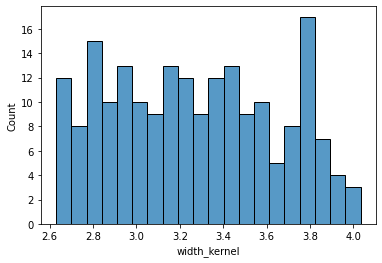

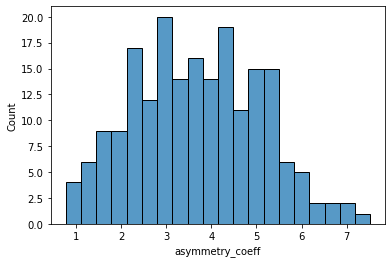

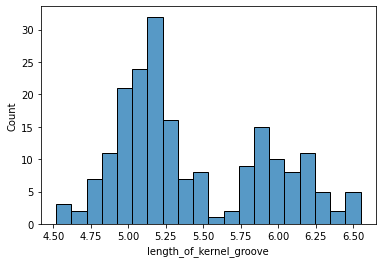

In [12]:
# visualizing the new distribution
for column in dataset.iloc[:,:-1].columns:
    plt.figure()
    sns.histplot(data = dataset, x = column, bins = 20)
    plt.show()

##### Plotting the correlation plot to see the effect of data cleaning on the dataset

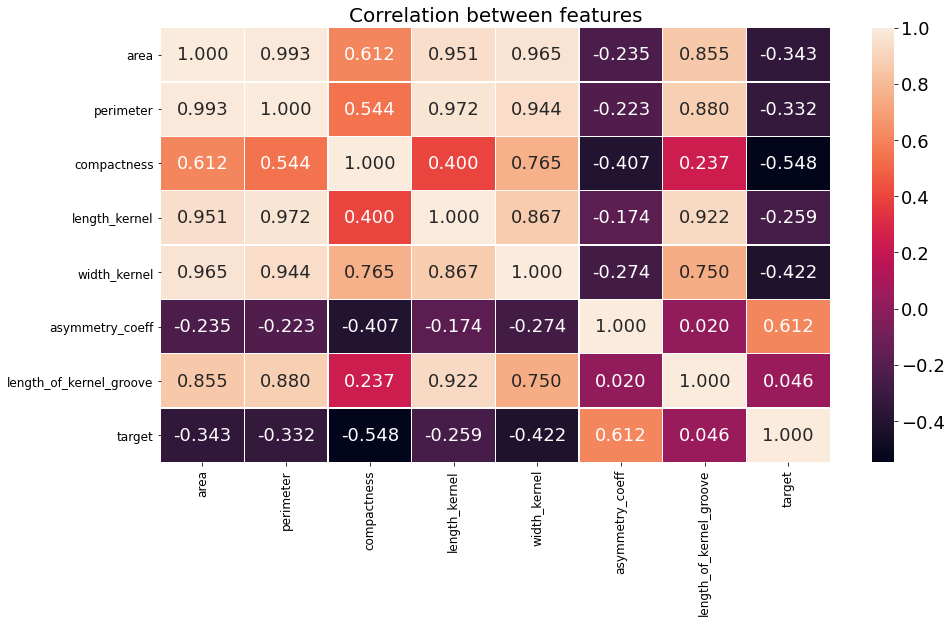

In [13]:
plot_heatmap(dataset.corr(), 'Correlation between features')

### <span style="color:blue"> Correlation after Data Cleaning</span>

- Compactness had a higher negative correlation with the target -0.539 to -0.548
- Lenght of kernel also had a higher negative correlation with the target -0.249 to -0.259
- Assymetry Coefficient had a higher positive correlation with the target 0.574 to 0.612
- Length of kernel groove had a higher positive correlation with the target 0.036 to 0.046

### Splitting the dataset into matrix of features and target

In [14]:
data = dataset.copy()

# Separating the dataset into matrix of features and target'
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [15]:
# separating the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Building the Base Models

#### Decision Tree Classifier

In [16]:
%%time
from sklearn.tree import DecisionTreeClassifier, export_graphviz

d_tree = DecisionTreeClassifier(random_state = 0)

from sklearn.model_selection import GridSearchCV
d_tree_params = [{'max_depth':[3, 5, 10, None]}]
d_tree_grid = GridSearchCV(d_tree, d_tree_params, cv=10)
d_tree_grid.fit(X, y)
d_tree_average_score = d_tree_grid.cv_results_['mean_test_score'].astype(float)
result = d_tree_grid.cv_results_
d_tree_grid.best_estimator_

Wall time: 148 ms


DecisionTreeClassifier(max_depth=10, random_state=0)

In [17]:
d_tree_average_score

array([0.92947368, 0.92947368, 0.93947368, 0.93947368])

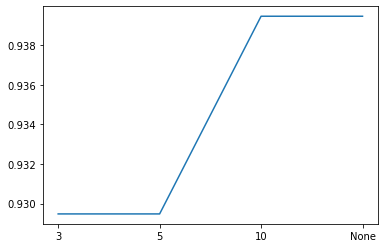

In [18]:
plt.figure()
sns.lineplot(x=['3', '5', '10', 'None'], y=d_tree_average_score)
plt.show()

### <span style="color:blue"> Optimal Parameters for Decision Tree </span>
From Cross validation, the optimal tree parameter is max_depth = 10

In [99]:
%%time
# Building the model with optimal parameters
d_tree = DecisionTreeClassifier(max_depth=10, random_state=0)
d_tree.fit(X_train, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, d_tree.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, d_tree.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, d_tree.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0
Wall time: 39 ms


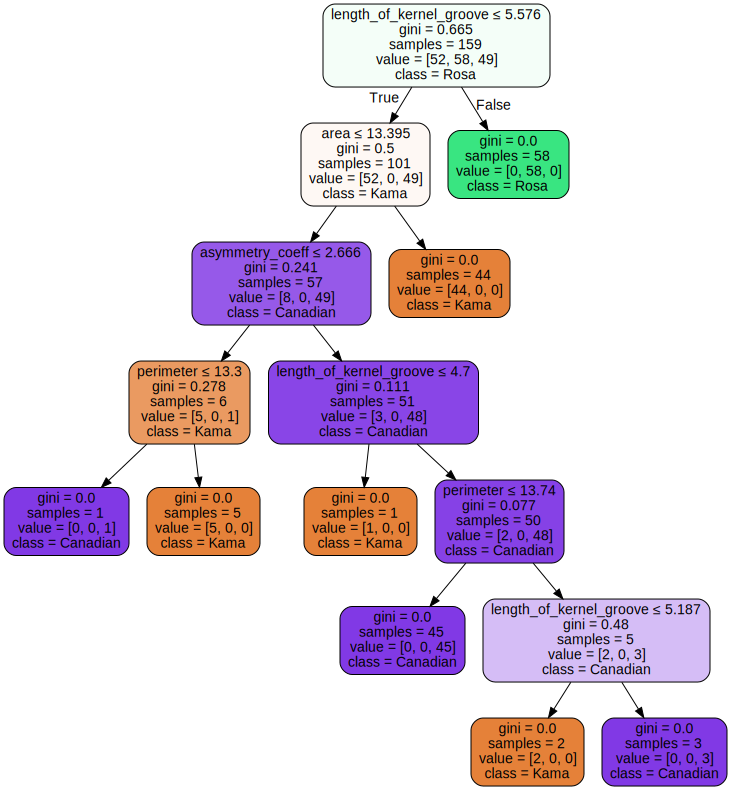

In [20]:
import graphviz
cn = ['Kama', 'Rosa', 'Canadian']

dot_data = export_graphviz(d_tree, 
                  feature_names=dataset.columns[:-1],
                  class_names = cn,
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)

graph = graphviz.Source(dot_data, format = 'png')
graph.render(filename='seeds_decision_tree_01')
graph

## <span style="color:blue"> Comments about final splitting rules </span>

#### Gini Impurity
Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. If we have $C$ total classes and $p(i)$ is the probability of picking a datapoint with class $i$, then the Gini Impurity is calculated as
  
  $G = \sum\limits_{i=1}^{C}p(i)*(1-p(i))$
  
##### Splitting Rule #1 
Length of Kernel Groove <= 5.576

This separates all 58 samples of the Rosa species, since those samples fail this condition. The Gini impurity at this leaf is 0, implying that the node is pure.

Another split occurs for the observations that pass this condition. 

##### Splitting Rule #2
Area <= 13.395

Most (44 out of 52), but not all of the Kama samples fail this conditon so these are classified out thus resulting in a pure leaf node of 44 Kama samples.
Another split occurs for the values that pass this condition which include 8 Kama and 49 Canadian.

##### Splitting Rule #3
Assymetry Coefficient <= 2.666

48 Canadian samples and 3 Kama samples fail this condition 
Another split occurs for the values that fail 

##### Splitting Rule #4
Length of Kernel Groove <= 4.7

1 Kama sample passes this condition
Another split occurs for the values that fail 

##### Splitting Rule #5
Perimeter <= 13.74

45 Canadian samples pass this condition. This produces a leaf node with 45 Canadian samples.
Another split occurs for the 5 samples that fail which include 2 Kama and 3 Canadian samples.


##### Splitting Rule #6
Length of Kernel Groove <= 5.187

2 Kama samples pass this condition.
3 Canadian samples fail this condition.
This rule produces 2 pure leaf nodes (one containing 2 Kama and the other containing 3 Canadian samples). 

##### Splitting Rule #7
This is for the samples that passes Splitting Rule #3
Perimeter <= 13.3 

1 Canadian sample passes the condition while the 5 Kama samples fail resulting in two pure leaf nodes.

Length of Kernel Groove and Perimeter were used as splitting rules more than once. 

In [21]:
%%time
# Evaluating the model on the test set
d_tree_pred = d_tree.predict(X_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, d_tree_pred), 2))
print("F1_score: ", round(f1_score(y_test, d_tree_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, d_tree.predict_proba(X_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.95
Wall time: 10 ms


#### Random Forest Classifier

In [22]:
%%time
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(random_state = 0)

r_forest_params = [{'n_estimators':[5, 10, 50, 150, 200], 'max_depth':[3, 5, 10, None]}]
r_forest_grid = GridSearchCV(r_forest, r_forest_params, cv=10)
r_forest_grid.fit(X_train, y_train)
r_forest_average_score = r_forest_grid.cv_results_['mean_test_score'].astype(float)
r_forest_grid.best_estimator_

Wall time: 19.5 s


RandomForestClassifier(max_depth=5, n_estimators=150, random_state=0)

In [23]:
r_forest_average_score

array([0.88083333, 0.9375    , 0.93125   , 0.925     , 0.925     ,
       0.9375    , 0.92458333, 0.95      , 0.95625   , 0.95625   ,
       0.925     , 0.94958333, 0.95      , 0.95625   , 0.95625   ,
       0.925     , 0.94958333, 0.95      , 0.95625   , 0.95625   ])

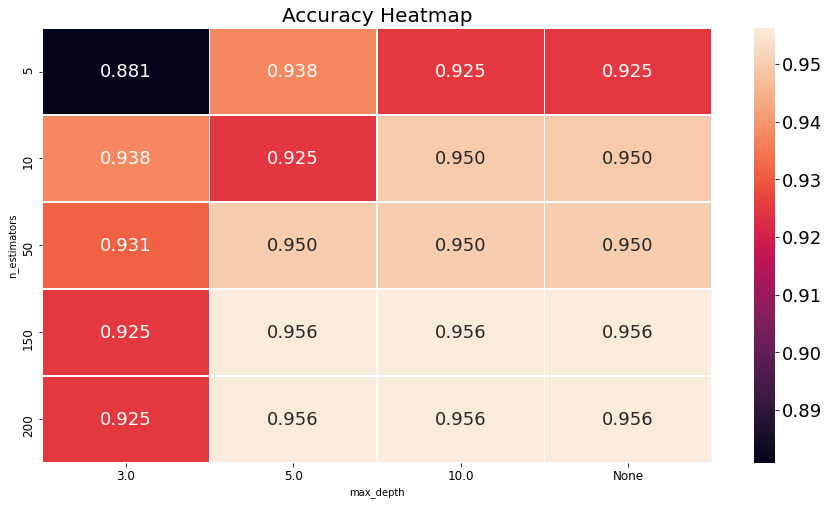

In [24]:
plot_data = pd.DataFrame(r_forest_grid.cv_results_['params'])
plot_data.fillna("None", inplace = True)
plot_data['accuracy'] = r_forest_average_score
pivot = plot_data.pivot_table(values='accuracy',index='n_estimators',columns='max_depth')
plot_heatmap(pivot, 'Accuracy Heatmap')

### <span style="color:blue"> Optimal Parameters for Random Forest </span>
From Cross validation, the optimal parameter is max_depth = 5, n_estimators = 150

In [25]:
%%time
# Building model with optimal parameters
r_forest = RandomForestClassifier(max_depth=5, n_estimators=150, random_state=0)
r_forest.fit(X_train, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, r_forest.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, r_forest.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, r_forest.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0
Wall time: 213 ms


In [26]:
%%time
# Evaluating the model on the test set
r_forest_pred = r_forest.predict(X_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, r_forest_pred), 2))
print("F1_score: ", round(f1_score(y_test, r_forest_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, r_forest.predict_proba(X_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.99
Wall time: 33 ms


#### Gradient Tree Boosting Classifier

In [27]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
g_boost = GradientBoostingClassifier(random_state = 0)

g_boost_params = [{'n_estimators':[5, 10, 50, 150, 200]}]
g_boost_grid = GridSearchCV(g_boost, g_boost_params, cv=10)
g_boost_grid.fit(X_train, y_train)
g_boost_average_score = g_boost_grid.cv_results_['mean_test_score'].astype(float)
result = g_boost_grid.cv_results_
g_boost_grid.best_estimator_

Wall time: 38.3 s


GradientBoostingClassifier(n_estimators=200, random_state=0)

In [28]:
g_boost_average_score

array([0.92458333, 0.93083333, 0.94333333, 0.94333333, 0.9625    ])

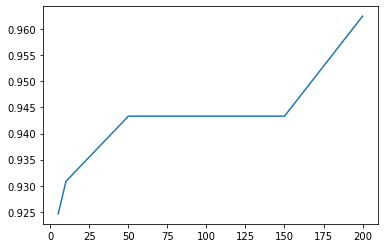

In [29]:
plt.figure()
sns.lineplot(x=[5, 10, 50, 150, 200], y=g_boost_average_score)
plt.show()

### <span style="color:blue"> Optimal Parameters for Gradient Tree Boosting </span>
From Cross validation, the optimal parameter is n_estimators = 200

In [30]:
%%time
# Building model with optimal parameters
g_boost = GradientBoostingClassifier(n_estimators=200, random_state=0)
g_boost.fit(X_train, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, g_boost.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, g_boost.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, g_boost.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0
Wall time: 2.22 s


In [31]:
%%time
# Evaluating the model on the test set
g_boost_pred = g_boost.predict(X_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, g_boost_pred), 2))
print("F1_score: ", round(f1_score(y_test, g_boost_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, g_boost.predict_proba(X_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  1.0
Wall time: 22.7 ms


## Improving the model computation by removing multicollinear features 

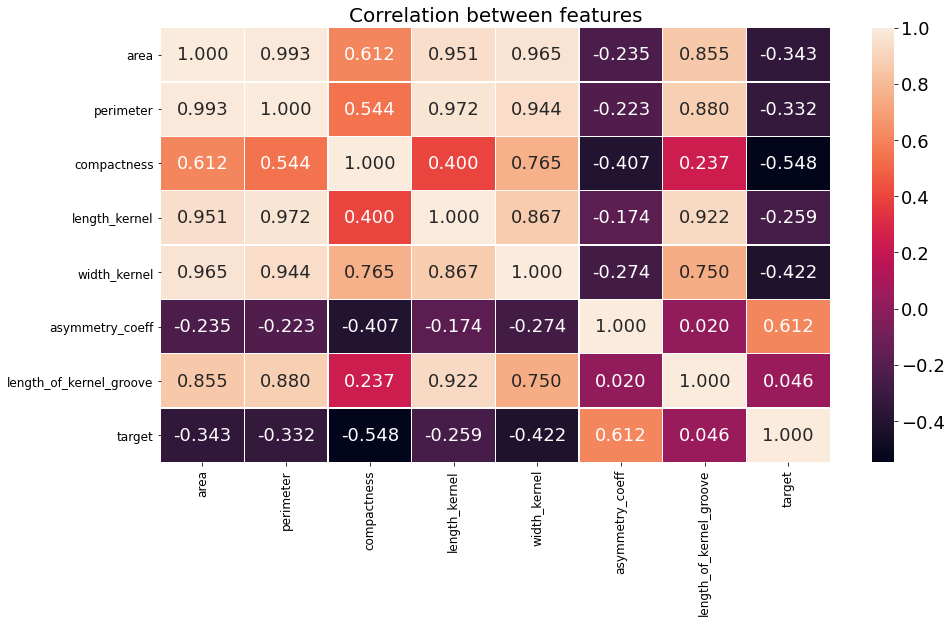

In [32]:
plot_heatmap(data.corr(), 'Correlation between features')

## <span style="color:blue"> Justification of Feature Removal </span>

Area, Perimeter, Length of kernel and Length of kernel Groove all have high inter-feature correlation.

Area and Perimeter is directly proportional to Length of kernel and Width of Kernel and the inter-feature correlation between Area and Perimeter is the highest (0.993) which shows some level of collinearity. We dropped Perimeter because Area has a higher correlation with the target.

Also, Length of kernel was dropped because it has high inter-feature correlation with Length of Kernel Groove and Area. Since Area is gotten from the Length of Kernel, there is no need keeping both features.


In [33]:
dataset = data[['area', 'compactness' , 'width_kernel', 'asymmetry_coeff', 'length_of_kernel_groove', 'target']]

# Separating the dataset into matrix of features and target'
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Decision Tree Model

In [35]:
%%time

d_tree_grid.fit(X_train, y_train)
d_tree_average_score = d_tree_grid.cv_results_['mean_test_score'].astype(float)
result = d_tree_grid.cv_results_
d_tree_grid.best_estimator_

Wall time: 51.1 ms


DecisionTreeClassifier(max_depth=5, random_state=0)

In [36]:
d_tree_average_score

array([0.92458333, 0.93083333, 0.93083333, 0.93083333])

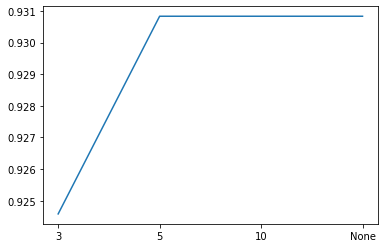

In [37]:
plt.figure()
sns.lineplot(x=['3', '5', '10', 'None'], y=d_tree_average_score)
plt.show()

### <span style="color:blue"> Optimal Parameters for Decision Tree </span>
From Cross validation, the optimal tree parameter is max_depth = 5

In [38]:
%%time
# Building the model with optimal parameters
d_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
d_tree.fit(X_train, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, d_tree.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, d_tree.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, d_tree.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 14.1 ms


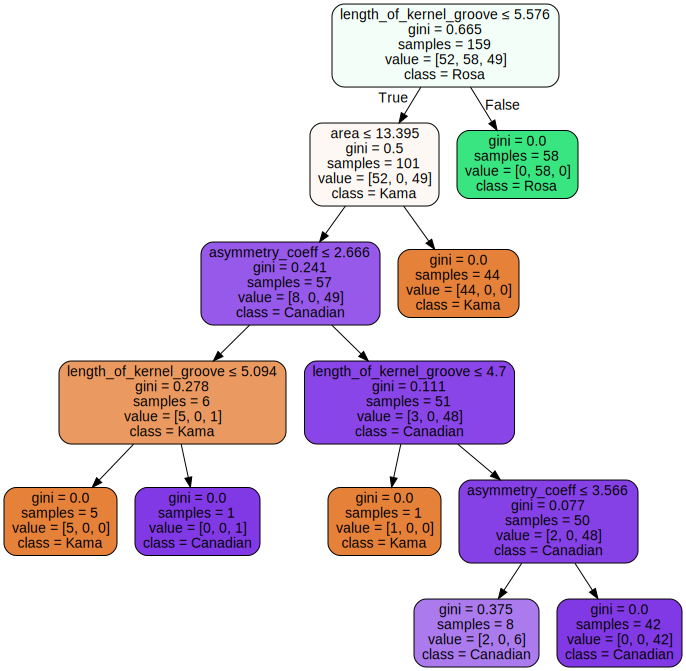

In [39]:
dot_data = export_graphviz(d_tree, 
                  feature_names=dataset.columns[:-1],
                  class_names = cn,
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)

graph = graphviz.Source(dot_data, format = 'png')
graph.render(filename='seeds_decision_tree_02')
graph

### <span style="color:blue"> Comments about final splitting rules (After Feature Selection) </span>

#### Gini Impurity
Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. If we have $C$ total classes and $p(i)$ is the probability of picking a datapoint with class $i$, then the Gini Impurity is calculated as
  
  $G = \sum\limits_{i=1}^{C}p(i)*(1-p(i))$
  
##### Splitting Rule #1 
Length of Kernel Groove <= 5.576

This separates all 58 samples of the Rosa species, since those samples fail this condition. The Gini impurity at this leaf is 0, implying that the node is pure.

Another split occurs for the observations that pass this condition. 

##### Splitting Rule #2
Area <= 13.395

Most (44 out of 52), but not all of the Kama samples fail this conditon so these are classified out thus reaulting in a pure leaf node of 44 Kama samples.
Another split occurs for the values that pass this condition which include 8 Kama and 49 Canadian.

##### Splitting Rule #3
Assymetry Coefficient <= 2.666

48 Canadian samples and 3 Kama samples fail this condition 
Another split occurs for the values that fail 

##### Splitting Rule #4
Length of Kernel Groove <= 4.7

1 Kama sample passes this condition creating a leaf node with one Kama sample.
Another split occurs for the values that fail 

##### Splitting Rule #5
Assymetry Coefficient <= 3.566

42 Canadian samples fail this condition and produce a pure leaf node.
6 Canadian and 2 Kama samples pass this condition creating an impure leaf node. 


##### Splitting Rule #6
This is for the samples that passes Splitting Rule #3
Length of Kernel Groove <= 5.094 

1 Canadian sample passes the condition while the 5 Kama samples fail resulting in two pure leaf nodes.

Length of Kernel Groove and Perimeter were used as splitting rules more than once. 

In [40]:
%%time
# Evaluating the model on the test set
d_tree_pred = d_tree.predict(X_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, d_tree_pred), 2))
print("F1_score: ", round(f1_score(y_test, d_tree_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, d_tree.predict_proba(X_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.95
Wall time: 18 ms


##### Building the Random Forest Model

In [41]:
%%time

r_forest_grid.fit(X_train, y_train)
r_forest_average_score = r_forest_grid.cv_results_['mean_test_score'].astype(float)
r_forest_grid.best_estimator_

Wall time: 17.8 s


RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [42]:
r_forest_average_score

array([0.94375, 0.95625, 0.95   , 0.95625, 0.94375, 0.94375, 0.9625 ,
       0.95625, 0.95625, 0.9625 , 0.9375 , 0.9625 , 0.95625, 0.95625,
       0.95625, 0.9375 , 0.9625 , 0.95625, 0.95625, 0.95625])

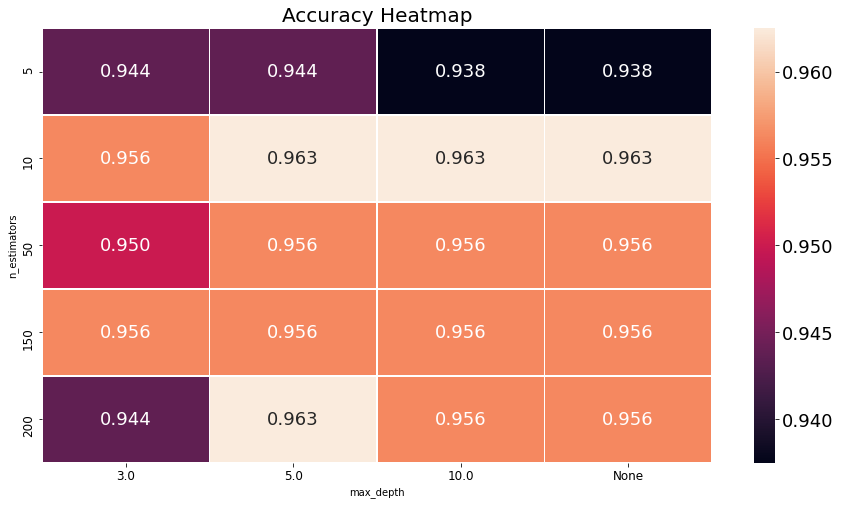

In [43]:
plot_data = pd.DataFrame(r_forest_grid.cv_results_['params'])
plot_data.fillna("None", inplace = True)
plot_data['accuracy'] = r_forest_average_score
pivot = plot_data.pivot_table(values='accuracy',index='n_estimators',columns='max_depth')
plot_heatmap(pivot, 'Accuracy Heatmap')

### <span style="color:blue"> Optimal Parameters for Random Forest </span>
From Cross validation, the optimal parameter is max_depth = 5, n_estimators = 10

In [44]:
%%time
# Building model with optimal parameters
r_forest = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)
r_forest.fit(X_train, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, r_forest.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, r_forest.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, r_forest.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 39.2 ms


In [45]:
%%time
# Evaluating the model on the test set
r_forest_pred = r_forest.predict(X_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, r_forest_pred), 2))
print("F1_score: ", round(f1_score(y_test, r_forest_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, r_forest.predict_proba(X_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.99
Wall time: 18.6 ms


##### Gradient Tree Boosting Model

In [46]:
%%time

g_boost_grid.fit(X_train, y_train)
g_boost_average_score = g_boost_grid.cv_results_['mean_test_score'].astype(float)
result = g_boost_grid.cv_results_
g_boost_grid.best_estimator_

Wall time: 8.05 s


GradientBoostingClassifier(n_estimators=50, random_state=0)

In [47]:
g_boost_average_score

array([0.93708333, 0.93708333, 0.95      , 0.94375   , 0.95      ])

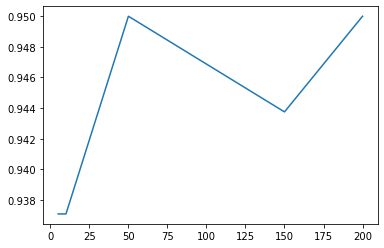

In [48]:
plt.figure()
sns.lineplot(x=[5, 10, 50, 150, 200], y=g_boost_average_score)
plt.show()

### <span style="color:blue"> Optimal Parameters for Gradient Tree Boosting </span>
From Cross validation, the optimal parameter is n_estimators = 50

In [49]:
%%time
# Building model with optimal parameters
g_boost = GradientBoostingClassifier(n_estimators=50, random_state=0)
g_boost.fit(X_train, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, g_boost.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, g_boost.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, g_boost.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0
Wall time: 113 ms


In [50]:
%%time
# Evaluating the model on the test set
g_boost_pred = g_boost.predict(X_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, g_boost_pred), 2))
print("F1_score: ", round(f1_score(y_test, g_boost_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, g_boost.predict_proba(X_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  90.0
F1_score:  0.9
AUC:  1.0
Wall time: 12.2 ms


### <span style="color:blue">Removing multicolinear features had the following effects on the Tree based models:</span>

Decision Tree
- The training accuracy of the Decision Tree reduced from 100% to 98.74% (less overfitting to the training set)
- The test accuracy remained constant at 92.5%
- Wall time for finding optimal parameters with cross validation reduced from 144ms to 66ms.

Random Forest
- The training accuracy of the Random Forest reduced from 100% to 98.74% (less overfitting to the training set)
- The test accuracy remaind constant at 92.5%
- Wall time for finding optimal parameters with cross validation reduced from 32.8s to 31.1s.

Gradient Boost
- The training accuracy of the model remained constant at 100% (still seems to overfit the training set)
- The test accuracy reduced from 92.5% to 90% (model performs slightly worse on unseen data)
- Wall time for finding optimal parameters with cross validation reduced from 23.5s to 7.98s.

## Investigating the effects of  feature scaling on Trees algorithm

### Standard Scaler

In [51]:
# Feature scaling the matrix of features
X_scaler = StandardScaler()
X_SS = X_scaler.fit_transform(X_train)
X_SS_test = X_scaler.transform(X_test)

The normalization teschnique used is z-score normalization which modifies the data to have a mean of 0 and a standard deviation of 1 thus making the aggregate data have the properties of a normal distribution.

##### Decision Tree Model

In [52]:
d_tree_grid.fit(X_SS, y_train)
d_tree_average_score = d_tree_grid.cv_results_['mean_test_score'].astype(float)
result = d_tree_grid.cv_results_
d_tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=0)

In [53]:
d_tree_average_score

array([0.92458333, 0.93083333, 0.93083333, 0.93083333])

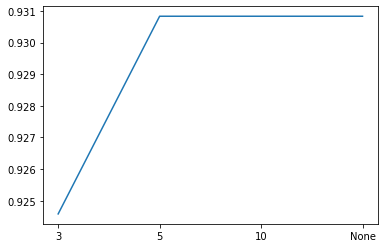

In [54]:
plt.figure()
sns.lineplot(x=['3', '5', '10', 'None'], y=d_tree_average_score)
plt.show()

In [55]:
%%time
# Building the model with optimal parameters
d_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
d_tree.fit(X_SS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, d_tree.predict(X_SS)), 2))
print("F1_score: ", round(f1_score(y_train, d_tree.predict(X_SS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, d_tree.predict_proba(X_SS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 11.5 ms


In [56]:
%%time
# Evaluating the model on the test set
d_tree_pred = d_tree.predict(X_SS_test)
accuracy_1 = round(100 * accuracy_score(y_test, d_tree_pred), 2)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, d_tree_pred), 2))
print("F1_score: ", round(f1_score(y_test, d_tree_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, d_tree.predict_proba(X_SS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.95
Wall time: 17 ms


##### Building the Random Forest Model

In [57]:
r_forest_grid.fit(X_SS, y_train)
r_forest_average_score = r_forest_grid.cv_results_['mean_test_score'].astype(float)
r_forest_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [58]:
r_forest_average_score

array([0.94375, 0.95625, 0.95   , 0.95625, 0.94375, 0.94375, 0.9625 ,
       0.95625, 0.95625, 0.9625 , 0.9375 , 0.9625 , 0.95625, 0.95625,
       0.95625, 0.9375 , 0.9625 , 0.95625, 0.95625, 0.95625])

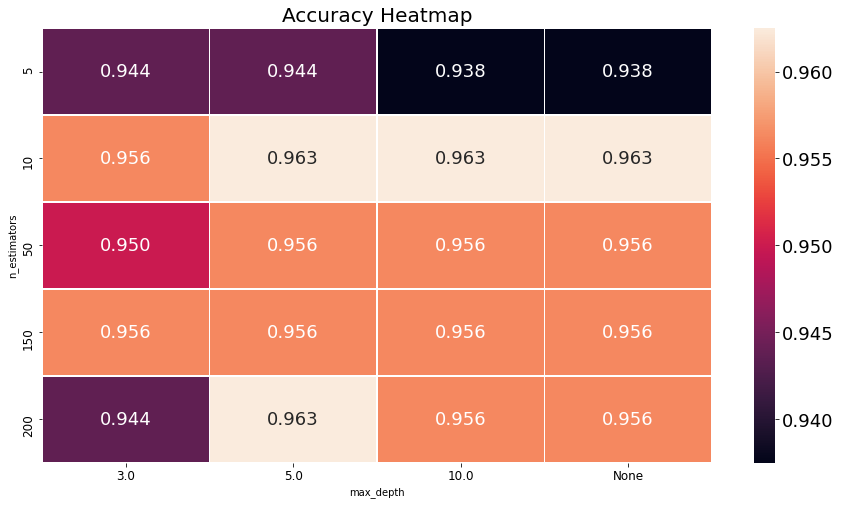

In [59]:
plot_data = pd.DataFrame(r_forest_grid.cv_results_['params'])
plot_data.fillna("None", inplace = True)
plot_data['accuracy'] = r_forest_average_score
pivot = plot_data.pivot_table(values='accuracy',index='n_estimators',columns='max_depth')
plot_heatmap(pivot, 'Accuracy Heatmap')

In [60]:
%%time
# Building model with optimal parameters
r_forest = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)
r_forest.fit(X_SS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, r_forest.predict(X_SS)), 2))
print("F1_score: ", round(f1_score(y_train, r_forest.predict(X_SS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, r_forest.predict_proba(X_SS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 32 ms


In [61]:
%%time
# Evaluating the model on the test set
r_forest_pred = r_forest.predict(X_SS_test)
accuracy_1 = round(100 * accuracy_score(y_test, r_forest_pred), 2)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, r_forest_pred), 2))
print("F1_score: ", round(f1_score(y_test, r_forest_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, r_forest.predict_proba(X_SS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.99
Wall time: 15.8 ms


##### Gradient Tree Boosting Model

In [62]:
g_boost_grid.fit(X_SS, y_train)
g_boost_average_score = g_boost_grid.cv_results_['mean_test_score'].astype(float)
result = g_boost_grid.cv_results_
g_boost_grid.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [63]:
g_boost_average_score

array([0.93708333, 0.93708333, 0.95      , 0.94375   , 0.95      ])

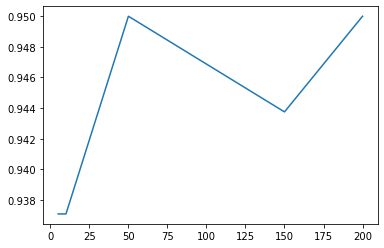

In [64]:
plt.figure()
sns.lineplot(x=[5, 10, 50, 150, 200], y=g_boost_average_score)
plt.show()

In [65]:
%%time
# Building model with optimal parameters
g_boost = GradientBoostingClassifier(n_estimators=50, random_state=0)
g_boost.fit(X_SS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, g_boost.predict(X_SS)), 2))
print("F1_score: ", round(f1_score(y_train, g_boost.predict(X_SS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, g_boost.predict_proba(X_SS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0
Wall time: 169 ms


In [66]:
# Evaluating the model on the test set
g_boost_pred = g_boost.predict(X_SS_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, g_boost_pred), 2))
print("F1_score: ", round(f1_score(y_test, g_boost_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, g_boost.predict_proba(X_SS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  90.0
F1_score:  0.9
AUC:  1.0


### MinMax Scaler

In [67]:
# Feature scaling the matrix of features
X_scaler = MinMaxScaler()
X_MMS = X_scaler.fit_transform(X_train)
X_MMS_test = X_scaler.transform(X_test)

##### Decision Tree Model

In [68]:
d_tree_grid.fit(X_MMS, y_train)
d_tree_average_score = d_tree_grid.cv_results_['mean_test_score'].astype(float)
result = d_tree_grid.cv_results_
d_tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=0)

In [69]:
d_tree_average_score

array([0.93083333, 0.93708333, 0.93708333, 0.93708333])

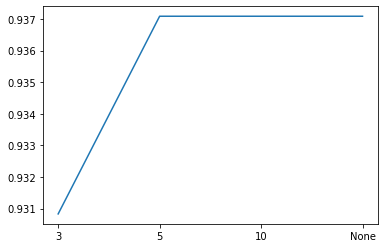

In [70]:
plt.figure()
sns.lineplot(x=['3', '5', '10', 'None'], y=d_tree_average_score)
plt.show()

In [71]:
%%time
# Building the model with optimal parameters
d_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
d_tree.fit(X_MMS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, d_tree.predict(X_MMS)), 2))
print("F1_score: ", round(f1_score(y_train, d_tree.predict(X_MMS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, d_tree.predict_proba(X_MMS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 12.2 ms


In [72]:
%%time
# Evaluating the model on the test set
d_tree_pred = d_tree.predict(X_MMS_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, d_tree_pred), 2))
print("F1_score: ", round(f1_score(y_test, d_tree_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, d_tree.predict_proba(X_MMS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.95
Wall time: 9.6 ms


##### Building the Random Forest Model

In [73]:
r_forest_grid.fit(X_MMS, y_train)
r_forest_average_score = r_forest_grid.cv_results_['mean_test_score'].astype(float)
r_forest_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [74]:
r_forest_average_score

array([0.95   , 0.95625, 0.95625, 0.9625 , 0.95   , 0.95   , 0.96875,
       0.9625 , 0.9625 , 0.96875, 0.94375, 0.96875, 0.9625 , 0.9625 ,
       0.9625 , 0.94375, 0.96875, 0.9625 , 0.9625 , 0.9625 ])

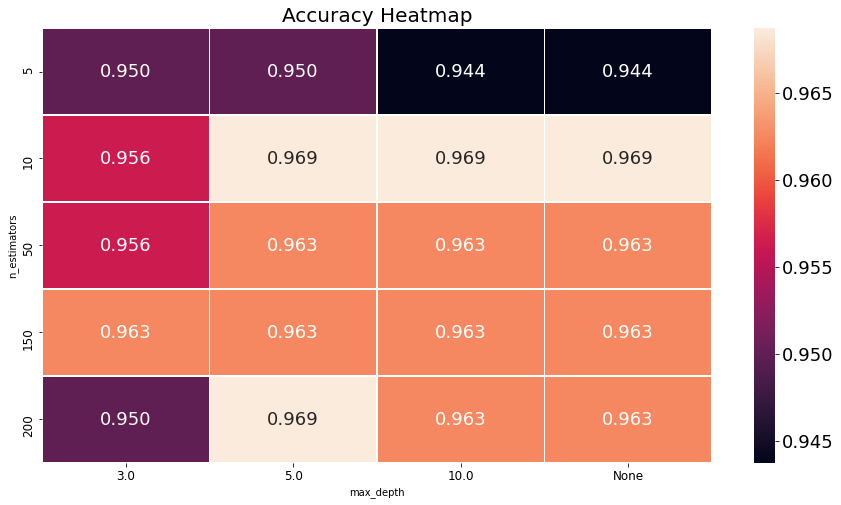

In [75]:
plot_data = pd.DataFrame(r_forest_grid.cv_results_['params'])
plot_data.fillna("None", inplace = True)
plot_data['accuracy'] = r_forest_average_score
pivot = plot_data.pivot_table(values='accuracy',index='n_estimators',columns='max_depth')
plot_heatmap(pivot, 'Accuracy Heatmap')

In [76]:
%%time
# Building model with optimal parameters
r_forest = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)
r_forest.fit(X_MMS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, r_forest.predict(X_MMS)), 2))
print("F1_score: ", round(f1_score(y_train, r_forest.predict(X_MMS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, r_forest.predict_proba(X_MMS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 32.7 ms


In [77]:
%%time
# Evaluating the model on the test set
r_forest_pred = r_forest.predict(X_MMS_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, r_forest_pred), 2))
print("F1_score: ", round(f1_score(y_test, r_forest_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, r_forest.predict_proba(X_MMS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.99
Wall time: 17.8 ms


##### Gradient Tree Boosting Model

In [78]:
g_boost_grid.fit(X_MMS, y_train)
g_boost_average_score = g_boost_grid.cv_results_['mean_test_score'].astype(float)
result = g_boost_grid.cv_results_
g_boost_grid.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [79]:
g_boost_average_score

array([0.94333333, 0.94333333, 0.95625   , 0.95      , 0.95625   ])

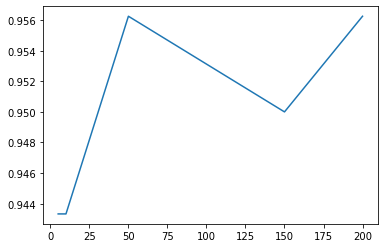

In [80]:
plt.figure()
sns.lineplot(x=[5, 10, 50, 150, 200], y=g_boost_average_score)
plt.show()

In [81]:
%%time
# Building model with optimal parameters
g_boost = GradientBoostingClassifier(n_estimators=50, random_state=0)
g_boost.fit(X_MMS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, g_boost.predict(X_MMS)), 2))
print("F1_score: ", round(f1_score(y_train, g_boost.predict(X_MMS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, g_boost.predict_proba(X_MMS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0
Wall time: 117 ms


In [82]:
# Evaluating the model on the test set
g_boost_pred = g_boost.predict(X_MMS_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, g_boost_pred), 2))
print("F1_score: ", round(f1_score(y_test, g_boost_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, g_boost.predict_proba(X_MMS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  90.0
F1_score:  0.9
AUC:  1.0


### Robust Scaler

In [83]:
# Feature scaling the matrix of features
X_scaler = RobustScaler()
X_RS = X_scaler.fit_transform(X_train)
X_RS_test = X_scaler.transform(X_test)

##### Decision Tree Model

In [84]:
d_tree_grid.fit(X_RS, y_train)
d_tree_average_score = d_tree_grid.cv_results_['mean_test_score'].astype(float)
result = d_tree_grid.cv_results_
d_tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=0)

In [85]:
d_tree_average_score

array([0.92458333, 0.93083333, 0.93083333, 0.93083333])

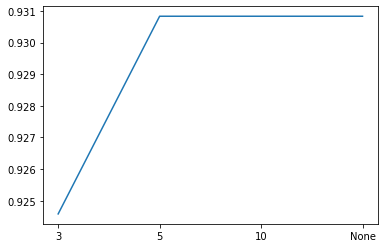

In [86]:
plt.figure()
sns.lineplot(x=['3', '5', '10', 'None'], y=d_tree_average_score)
plt.show()

In [87]:
%%time
# Building the model with optimal parameters
d_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
d_tree.fit(X_RS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, d_tree.predict(X_RS)), 2))
print("F1_score: ", round(f1_score(y_train, d_tree.predict(X_RS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, d_tree.predict_proba(X_RS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 15.1 ms


In [88]:
%%time
# Evaluating the model on the test set
d_tree_pred = d_tree.predict(X_RS_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, d_tree_pred), 2))
print("F1_score: ", round(f1_score(y_test, d_tree_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, d_tree.predict_proba(X_RS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.95
Wall time: 12.7 ms


##### Building the Random Forest Model

In [89]:
r_forest_grid.fit(X_RS, y_train)
r_forest_average_score = r_forest_grid.cv_results_['mean_test_score'].astype(float)
r_forest_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [90]:
r_forest_average_score

array([0.94375, 0.95625, 0.95   , 0.95625, 0.94375, 0.94375, 0.9625 ,
       0.95625, 0.95625, 0.9625 , 0.9375 , 0.9625 , 0.95625, 0.95625,
       0.95625, 0.9375 , 0.9625 , 0.95625, 0.95625, 0.95625])

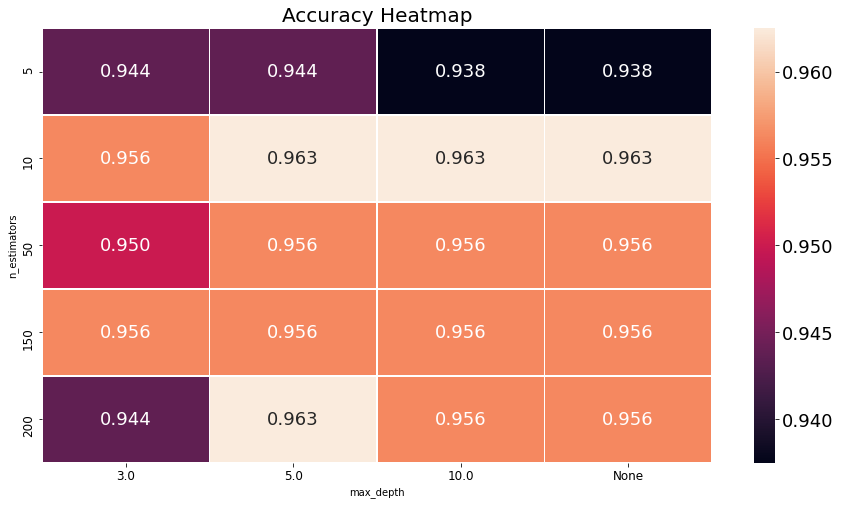

In [91]:
plot_data = pd.DataFrame(r_forest_grid.cv_results_['params'])
plot_data.fillna("None", inplace = True)
plot_data['accuracy'] = r_forest_average_score
pivot = plot_data.pivot_table(values='accuracy',index='n_estimators',columns='max_depth')
plot_heatmap(pivot, 'Accuracy Heatmap')

In [92]:
%%time
# Building model with optimal parameters
r_forest = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)
r_forest.fit(X_RS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, r_forest.predict(X_RS)), 2))
print("F1_score: ", round(f1_score(y_train, r_forest.predict(X_RS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, r_forest.predict_proba(X_RS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  98.74
F1_score:  0.99
AUC:  1.0
Wall time: 74 ms


In [93]:
%%time
# Evaluating the model on the test set
r_forest_pred = r_forest.predict(X_RS_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, r_forest_pred), 2))
print("F1_score: ", round(f1_score(y_test, r_forest_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, r_forest.predict_proba(X_RS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  92.5
F1_score:  0.92
AUC:  0.99
Wall time: 28.6 ms


##### Gradient Tree Boosting Model

In [94]:
g_boost_grid.fit(X_RS, y_train)
g_boost_average_score = g_boost_grid.cv_results_['mean_test_score'].astype(float)
result = g_boost_grid.cv_results_
g_boost_grid.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [95]:
g_boost_average_score

array([0.93708333, 0.93708333, 0.95      , 0.94375   , 0.95      ])

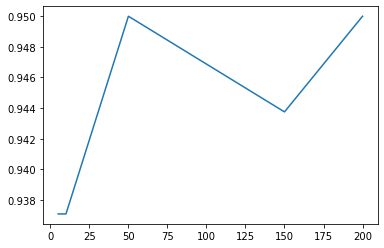

In [96]:
plt.figure()
sns.lineplot(x=[5, 10, 50, 150, 200], y=g_boost_average_score)
plt.show()

In [97]:
%%time
# Building model with optimal parameters
g_boost = GradientBoostingClassifier(n_estimators=50, random_state=0)
g_boost.fit(X_RS, y_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, g_boost.predict(X_RS)), 2))
print("F1_score: ", round(f1_score(y_train, g_boost.predict(X_RS), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, g_boost.predict_proba(X_RS), average = "macro", multi_class = "ovo"), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0
Wall time: 115 ms


In [98]:
# Evaluating the model on the test set
g_boost_pred = g_boost.predict(X_RS_test)

print("Test Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_test, g_boost_pred), 2))
print("F1_score: ", round(f1_score(y_test, g_boost_pred, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_test, g_boost.predict_proba(X_RS_test), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  90.0
F1_score:  0.9
AUC:  1.0


### <span style="color:blue"> Notes About Feature Scaling on Trees Algotithms </span>

Effects of Scalling on Training Set

| Scaling Method | Decision Tree Accuracy | Random Forest Accuracy | Gradient Boosting Accuracy |
| --- | --- | --- |--- |
| Standard Scaler | 98.74 | 98.74 | 100 |
| MinMax Scaler | 98.74 | 98.74 | 100 |
| Robust Scaler | 98.74 | 98.74 | 100 |
| No Scaler | 98.74 | 98.74 | 100 |

Effects of Scalling on Test Set

| Scaling Method | Decision Tree Accuracy | Random Forest Accuracy | Gradient Boosting Accuracy |
| --- | --- | --- |--- |
| Standard Scaler | 92.5 | 92.5 | 90 |
| MinMax Scaler | 92.5 | 92.5 | 90 |
| Robust Scaler | 92.5 | 92.5 | 90 |
| No Scaler | 92.5 | 92.5 | 90 |


The two tables above show the effect of scalling on training accuracy and testing accuracy of Tree based algorithms. From the table, it is obvious that regardless the scalling method used, the performance of the model remains the same. Thus, it can be concluded that Feature Scalling has no effect on the performance of Tree based algotithms.